In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
import warnings
warnings.filterwarnings('ignore')

In [8]:
data = fetch_california_housing()
df = pd.DataFrame(data.data, columns=data.feature_names)
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [10]:
df['MedHouseVal'] = data.target

In [11]:
x_train, x_test, y_train, y_test = train_test_split(df.drop('MedHouseVal', axis=1), df['MedHouseVal'], test_size=0.2, random_state=42)

In [ ]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.fit_transform(x_test)

In [13]:
x_train_scaled.shape

(16512, 8)

In [14]:
import keras

In [15]:
input_shape = x_train_scaled.shape[1]

In [16]:
model = keras.models.Sequential(
    [
        keras.Input(shape=(x_train_scaled.shape[1] ,)),
        keras.layers.Dense(64, activation='relu'),
        keras.layers.Dense(32, activation='relu'),
        keras.layers.Dense(1) # output = mean house value #MedHouseVal
    ]
)

In [17]:
model.compile( optimizer='adam', loss='mse', metrics=['mae'])

In [19]:
x_train_scaled.min(), x_train_scaled.max()

(np.float64(-2.377207142428577), np.float64(107.11644677509909))

In [21]:
history = model.fit(x_train_scaled, y_train, epochs=100, validation_split=0.2, batch_size=32)

Epoch 1/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.2316 - mae: 0.3259 - val_loss: 0.2853 - val_mae: 0.3555
Epoch 2/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2351 - mae: 0.3284 - val_loss: 0.2875 - val_mae: 0.3550
Epoch 3/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2294 - mae: 0.3248 - val_loss: 0.2747 - val_mae: 0.3565
Epoch 4/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2267 - mae: 0.3235 - val_loss: 0.2725 - val_mae: 0.3495
Epoch 5/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2234 - mae: 0.3223 - val_loss: 0.2839 - val_mae: 0.3606
Epoch 6/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.2260 - mae: 0.3239 - val_loss: 0.2978 - val_mae: 0.3585
Epoch 7/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.2242 - mae: 0.3197 - val_loss: 0.2810 - val_mae: 0.3588
Epoch 8/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2215 - mae: 0.3157 - val_loss: 0.2855 - val_mae: 0.3608
Epoch 9/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/

In [25]:
history.keys()

dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])

In [27]:
pd.DataFrame(history)

,loss,mae,val_loss,val_mae
0,0.228173,0.325854,0.285279,0.355541
1,0.227830,0.325418,0.287523,0.354951
2,0.226892,0.325121,0.274742,0.356493
3,0.225738,0.323764,0.272474,0.349494
4,0.227516,0.324267,0.283936,0.360620
...,...,...,...,...
95,0.209613,0.315162,0.284963,0.360857
96,0.207626,0.313241,0.281956,0.351316
97,0.206167,0.311625,0.278821,0.355579
98,0.206374,0.312660,0.282388,0.362566


In [22]:
import matplotlib.pyplot as plt

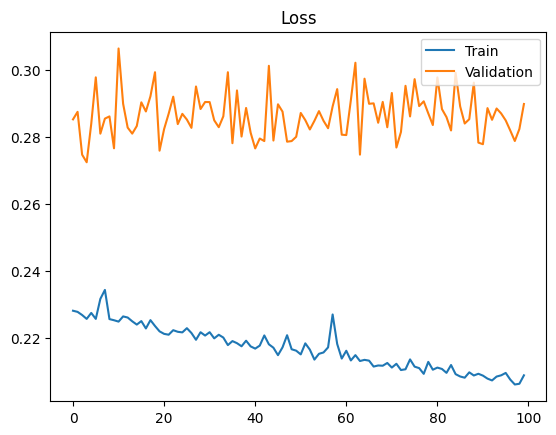

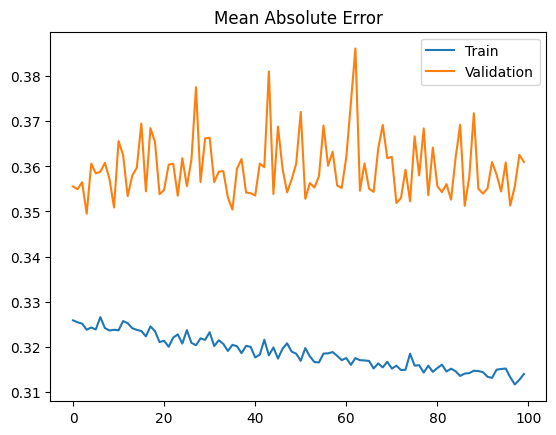

In [33]:
loss = history["loss"]
mae = history["mae"]
val_mae = history["val_mae"]
val_loss = history["val_loss"]


plt.plot(loss)
plt.plot(val_loss)
plt.title("Loss")
plt.legend(["loss", "val_loss"])
plt.legend(["Train", "Validation"], loc='upper right')
plt.show()

plt.plot(mae)
plt.plot(val_mae)
plt.title("Mean Absolute Error")
plt.legend(["Train", "Validation"], loc='upper right')
plt.show()


In [35]:
history_10_epochs = model.fit(x_train_scaled, y_train, epochs=10, validation_split=0.2, batch_size=32)

Epoch 1/10
413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.2126 - mae: 0.3150 - val_loss: 0.2857 - val_mae: 0.3562
Epoch 2/10
413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.1963 - mae: 0.3067 - val_loss: 0.2799 - val_mae: 0.3504
Epoch 3/10
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2057 - mae: 0.3093 - val_loss: 0.2859 - val_mae: 0.3626
Epoch 4/10
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2100 - mae: 0.3152 - val_loss: 0.2922 - val_mae: 0.3607
Epoch 5/10
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2025 - mae: 0.3097 - val_loss: 0.2877 - val_mae: 0.3698
Epoch 6/10
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2107 - mae: 0.3130 - val_loss: 0.2777 - val_mae: 0.3512
Epoch 7/10
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2027 - mae: 0.3111 - val_loss: 0.2898 - val_mae: 0.3553
Epoch 8/10
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2026 - mae: 0.3089 - val_loss: 0.2838 - val_mae: 0.3545
Epoch 9/10
413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - lo

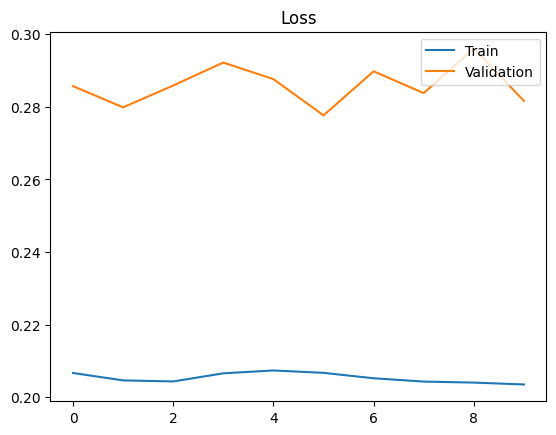

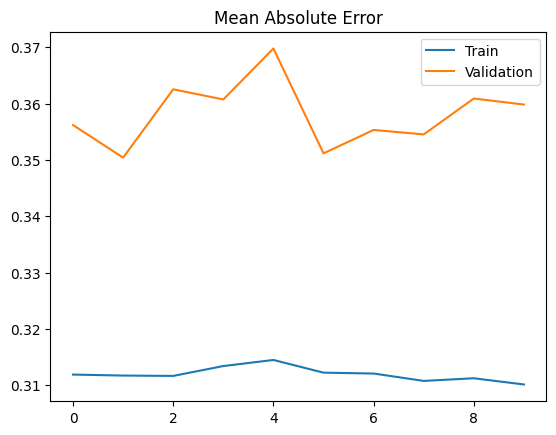

In [36]:
history = history_10_epochs.history

loss = history["loss"]
mae = history["mae"]
val_mae = history["val_mae"]
val_loss = history["val_loss"]


plt.plot(loss)
plt.plot(val_loss)
plt.title("Loss")
plt.legend(["loss", "val_loss"])
plt.legend(["Train", "Validation"], loc='upper right')
plt.show()

plt.plot(mae)
plt.plot(val_mae)
plt.title("Mean Absolute Error")
plt.legend(["Train", "Validation"], loc='upper right')
plt.show()

In [37]:
model.predict(x_test_scaled)

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


array([[0.48122194],
       [1.046879  ],
       [4.511662  ],
       ...,
       [4.917574  ],
       [0.70279145],
       [1.4976803 ]], dtype=float32)

In [38]:
model.evaluate(x_test_scaled, y_test)

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2727 - mae: 0.3600


[0.2762835919857025, 0.35832178592681885]